<a href="https://colab.research.google.com/github/JazminDavila/Practicas-Calificadas/blob/main/PRactica_de_cinetica_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>Cinética y Termodinámica</b> </font>
<a name="loading"></a>

<font size='4' style="color:#00A6D6">  <b>Jesus Alvarado-Huayhuaz

</b> </font>
<a name="loading"></a>

## [1] Instalación de librerías

In [ ]:
  %%capture
  !pip install rdkit
  !pip install pyscf

In [ ]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

## [2] Estructuras

### Isómero CIS

In [ ]:
# representación SMILES del isómero CIS
smi_cis = "Br/C=C\Br"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

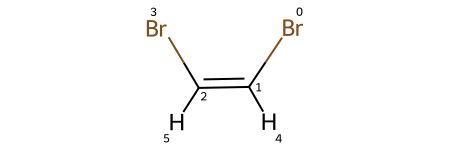

In [ ]:
#visualizamos
cis

In [ ]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

6

Br     1.671893    1.333598   -0.001924
C      0.639979   -0.203367   -0.387130
C     -0.661274   -0.228166   -0.235273
Br    -1.579474    1.315684    0.392195
H      1.158257   -1.103943   -0.751012
H     -1.229380   -1.113806   -0.460497


### Isómero TRANS

In [ ]:
smi_trans = "Br/C=C/Br"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

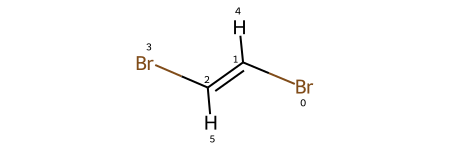

In [ ]:
trans

In [ ]:
!cat trans.xyz

6

Br     2.313073   -0.356639   -0.002411
C      0.537207    0.383412    0.001801
C     -0.542838   -0.387525   -0.001823
Br    -2.288308    0.362574    0.002431
H      0.428824    1.459864    0.007301
H     -0.447957   -1.461686   -0.007299


### Diedro = 90.0 º

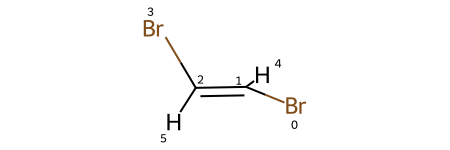

In [ ]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [ ]:
!cat diedro90.xyz

6

Br     1.827630   -0.686403    1.002709
C      0.639979   -0.203367   -0.387130
C     -0.661274   -0.228166   -0.235273
Br    -1.579474    1.315684    0.392195
H      1.064806    0.108150   -1.353844
H     -1.229380   -1.113806   -0.460497


## [3] Cálculo de energía

### CIS

In [ ]:
cis = gto.M(atom="cis.xyz")

In [ ]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [ ]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -5168.4201013412


-5168.420101341204

### Diedro 90

In [ ]:
cis_90 = gto.M(atom="diedro90.xyz")

In [ ]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [ ]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -5168.26490050148


-5168.264900501476

### TRANS

In [ ]:
trans = gto.M(atom="trans.xyz")

In [ ]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [ ]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -5168.42349712474


-5168.423497124737

## 4. Gráfica

In [ ]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [ ]:
import matplotlib.pyplot as plt
from energydiagram import ED

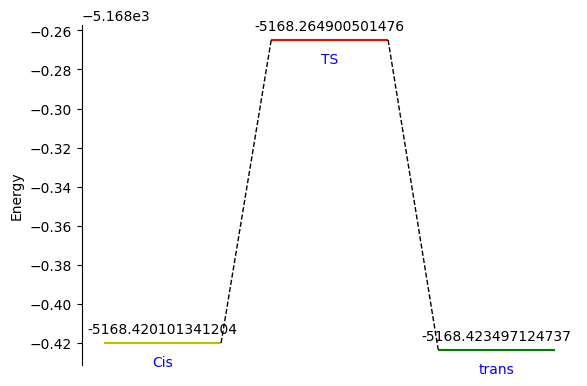

In [ ]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / $kcal$ $mol^{-1}$")

## Cinética:

In [ ]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

0.15520083972751308

## Termodinámica

In [ ]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es exotérmica
